# CSE 158: Assignment 2
Allston Fojas, Enrique Sanchez, Stephanie Moore

12/3/19

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Just for reference, here are the column descriptions for the following data set:

*   **ab_id:** At-bat ID. First 4 digits are year.
*   **batter_id:** Player ID of the batter.
*   **event:** Description of the result of the at-bat
*   **g_id:** Game ID
*   **inning:** Inning number
*   **o:** Number of outs after this at-bat
*   **p_score:** Score for the pitcher's team
*   **p_throws:** Which hand pitcher throws with. Single 
character, R or L
*   **pitcher_id:** player ID of the pitcher
*   **stand:** which side batter hits on. Single character, R or L
*   **top:** True if it's the top of the inning, False if it's the bottom



In [4]:
# Loading in batting data set
atbats = pd.read_csv('data/atbats.csv')
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [5]:
# Any missing values? Nope!
atbats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740389 entries, 0 to 740388
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ab_id       740389 non-null  int64 
 1   batter_id   740389 non-null  int64 
 2   event       740389 non-null  object
 3   g_id        740389 non-null  int64 
 4   inning      740389 non-null  int64 
 5   o           740389 non-null  int64 
 6   p_score     740389 non-null  int64 
 7   p_throws    740389 non-null  object
 8   pitcher_id  740389 non-null  int64 
 9   stand       740389 non-null  object
 10  top         740389 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 57.2+ MB


In [6]:
# Is each observation (ab_id) unique?
atbats['ab_id'].nunique() == len(atbats)

True

In [7]:
# How many at-bats?
len(atbats)

740389

In [8]:
# How many batters?
atbats['batter_id'].nunique()

1688

In [9]:
# How many pitchers?
atbats['pitcher_id'].nunique()

1332

In [10]:
# Over how many games?
atbats['g_id'].nunique()

9718

In [11]:
# Distribution of pitchers per inning
# Note: A typical game is 9 innings, anything over is considered overtime
atbats['inning'].value_counts(normalize=True).sort_index()

1     0.113501
2     0.110112
3     0.111462
4     0.112452
5     0.112368
6     0.112822
7     0.112041
8     0.111652
9     0.084261
10    0.008741
11    0.004980
12    0.002641
13    0.001475
14    0.000639
15    0.000380
16    0.000261
17    0.000111
18    0.000074
19    0.000028
Name: inning, dtype: float64

In [12]:
# Left hand, right hand pitches
atbats['p_throws'].value_counts(normalize=True)

R    0.732185
L    0.267815
Name: p_throws, dtype: float64

In [13]:
# Side batter bats on
atbats['stand'].value_counts(normalize=True)

R    0.584922
L    0.415078
Name: stand, dtype: float64

In [14]:
# Distribution of pitches at top/bottom of inning
# Note: ONLY the away team bats at the top of the inning.
#       Home team always bats at bottom of inning.
#
#       If the away team fails to take the lead after the
#       top of the 9th inning, the home team automatically
#       wins and will not bat at the bottom of the inning. 
#       Hence, why we may see more at-bats at top of the innings.

atbats['top'].value_counts()

True     377283
False    363106
Name: top, dtype: int64

In [15]:
atbats['top'].value_counts(normalize=True)

True     0.509574
False    0.490426
Name: top, dtype: float64

In [16]:
# Distribution of batting events
atbats['event'].value_counts(normalize=True)

Strikeout               0.212224
Groundout               0.182192
Single                  0.146942
Flyout                  0.109039
Walk                    0.076843
Lineout                 0.060690
Pop Out                 0.046536
Double                  0.044783
Home Run                0.029996
Forceout                0.020411
Grounded Into DP        0.019877
Hit By Pitch            0.009371
Field Error             0.008631
Sac Fly                 0.006447
Sac Bunt                0.005361
Intent Walk             0.005108
Triple                  0.004665
Double Play             0.002441
Runner Out              0.002353
Bunt Groundout          0.001692
Fielders Choice Out     0.001688
Strikeout - DP          0.000783
Bunt Pop Out            0.000769
Fielders Choice         0.000534
Batter Interference     0.000213
Catcher Interference    0.000207
Sac Fly DP              0.000103
Bunt Lineout            0.000070
Triple Play             0.000027
Sacrifice Bunt DP       0.000005
Name: even

Text(0, 0.5, 'Proportion of Frequency')

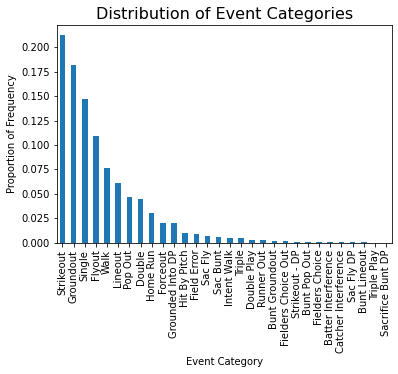

In [17]:
# Bar chart distribution of event categories
font_dict = {'fontsize': 16}
events = atbats['event'].value_counts(normalize=True).plot(kind='bar')
events.set_title('Distribution of Event Categories', fontdict=font_dict)
events.set_xlabel('Event Category')
events.set_ylabel('Proportion of Frequency')

Text(0, 0.5, 'Proportion of Frequency')

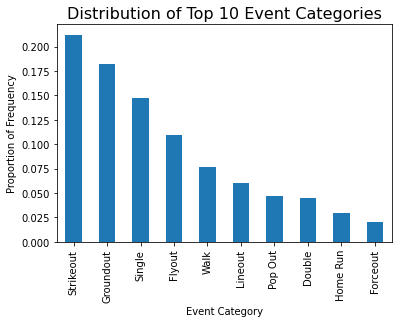

In [18]:
# Bar chart distribution of tope 10 event categories
events_top10 = atbats['event'].value_counts(normalize=True)[:10].plot(kind='bar')
events_top10.set_title('Distribution of Top 10 Event Categories', fontdict=font_dict)
events_top10.set_xlabel('Event Category')
events_top10.set_ylabel('Proportion of Frequency')

From the above distributions, we see that strikeouts and groundouts are the two most frequent events. In addition, six of the top ten event categories are types of outs (strikeout, groundout, flyout, lineout, pop out, and forceout), and the remaining four categories are types of plays in which the player gets on a base (single, walk, double, homerun). From these observations, we see that an event in which the player is out is more often to occur than an event in which the player gets on a base.

Since we want to convert this into a binary classification problem, we need to map the above batting events to either a postive at-bat or negative at-bat. We can define a positive at-bat as an event in which the batter either progresses to a base, scores a home run, or gets out but allows a teammate to progress (sacrifice). A negative at-bat is an event in which no progress is made.

In [19]:
# Creating dictionary for binary event mappings
bat_dic = {'Strikeout': 0, 'Groundout': 0, 'Single': 1, 
           'Flyout': 0, 'Walk': 1, 'Lineout': 0, 
           'Pop Out': 0, 'Double': 1, 'Home Run': 1, 
           'Forceout': 0, 'Grounded Into DP': 0, 
           'Hit By Pitch': 1, 'Field Error': 1, 'Sac Fly': 1, 
           'Sac Bunt': 1, 'Intent Walk': 1, 'Triple': 1, 
           'Double Play': 0, 'Runner Out': 0, 'Bunt Groundout': 0,
           'Fielders Choice Out': 1, 'Strikeout - DP': 0,
           'Bunt Pop Out': 0, 'Fielders Choice': 1, 
           'Batter Interference': 0, 'Catcher Interference': 1, 
           'Sac Fly DP': 1, 'Bunt Lineout': 0, 'Triple Play': 0,
           'Sacrifice Bunt DP': 0}

# Mapping events
atbats['event'] = atbats['event'].replace(bat_dic)
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,0,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,1,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,1,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,0,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,0,201500001,1,3,0,L,452657,L,True


In [20]:
# Proportion of positive vs negative events
atbats['event'].value_counts(normalize=True)

0    0.659322
1    0.340678
Name: event, dtype: float64

In [21]:
# Do events differ across innings?
atbats.groupby('inning')['event'].value_counts(normalize=True)

inning  event
1       0        0.649872
        1        0.350128
2       0        0.670265
        1        0.329735
3       0        0.658503
        1        0.341497
4       0        0.654496
        1        0.345504
5       0        0.652988
        1        0.347012
6       0        0.655378
        1        0.344622
7       0        0.660474
        1        0.339526
8       0        0.663925
        1        0.336075
9       0        0.677796
        1        0.322204
10      0        0.637361
        1        0.362639
11      0        0.618931
        1        0.381069
12      0        0.646036
        1        0.353964
13      0        0.627289
        1        0.372711
14      0        0.640592
        1        0.359408
15      0        0.619217
        1        0.380783
16      0        0.569948
        1        0.430052
17      0        0.621951
        1        0.378049
18      0        0.527273
        1        0.472727
19      0        0.619048
        1        0.38095

In [22]:
# Do they differ based on the hand the pitcher throws with?
atbats.groupby('p_throws')['event'].value_counts(normalize=True)

p_throws  event
L         0        0.657602
          1        0.342398
R         0        0.659951
          1        0.340049
Name: event, dtype: float64

In [23]:
# Or based on the side the batter hits on
atbats.groupby('stand')['event'].value_counts(normalize=True)

stand  event
L      0        0.655029
       1        0.344971
R      0        0.662369
       1        0.337631
Name: event, dtype: float64

In [24]:
# Top and bottom of inning
#
# Another way of thinking about this: 
# Does 'homefield advantage' actually affect the resulting events?
#
# We do see higher proportions (>1%) of positive events for home 
# teams but are they significant?

atbats.groupby('top')['event'].value_counts(normalize=True)

top    event
False  0        0.652639
       1        0.347361
True   0        0.665755
       1        0.334245
Name: event, dtype: float64

Now that we understand this data set a bit better, we can start thinking about building a model to predict a postive at-bat or a negative one. 

Given that ~66% of at-bats are negative, we can expect a trivial predictor (predicting 0 every time) to achieve an accuracy of ~66%. We must attempt to improve upon this.

Improvement can come from feature engineering (one-hot encoding, etc.), normalizing, or merging in the other data sets that are provided along with this one on Kaggle.

### More EDA

In [31]:
# Loading in ejections data set
ejections_df = pd.read_csv('data/ejections.csv')
ejections_df.head()

,ab_id,des,event_num,g_id,player_id,date,BS,CORRECT,team,is_home_team
0,2015003219,San Diego Padres center fielder Will Venable e...,732,201500044,461416,4/9/15,NaN,NaN,sdn,True
1,2015003219,San Diego Padres Manager Bud Black ejected by ...,734,201500044,111034,4/9/15,NaN,NaN,sdn,True
2,2015004134,Milwaukee Brewers second baseman Scooter Genne...,584,201500055,571697,4/10/15,Y,C,mil,True
3,2015006692,Cincinnati Reds Manager Bryan Price ejected by...,557,201500088,427406,4/12/15,NaN,NaN,cin,True
4,2015008446,Pittsburgh Pirates Manager Clint Hurdle ejecte...,402,201500111,116346,4/14/15,Y,I,pit,True


In [32]:
# Distribution of teams for player ejected
ejections_df['team'].value_counts(normalize=True)

tor    0.064389
det    0.047306
cha    0.047306
nya    0.044678
pit    0.043364
kca    0.042050
sdn    0.040736
was    0.036794
chn    0.036794
lan    0.036794
hou    0.035480
tex    0.035480
bos    0.034166
mia    0.032852
cin    0.032852
mil    0.032852
atl    0.031537
min    0.031537
nyn    0.030223
sfn    0.030223
laa    0.028909
azn    0.028909
col    0.028909
oak    0.024967
tba    0.024967
stl    0.024967
sea    0.021025
bal    0.021025
cle    0.017083
phi    0.011827
Name: team, dtype: float64

Text(0, 0.5, 'Proportion of Frequency')

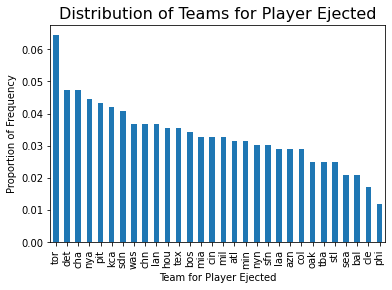

In [33]:
# Bar chart distribution of teams for player ejected
ejections = ejections_df['team'].value_counts(normalize=True).plot(kind='bar')
ejections.set_title('Distribution of Teams for Player Ejected', fontdict=font_dict)
ejections.set_xlabel('Team for Player Ejected')
ejections.set_ylabel('Proportion of Frequency')

Text(0, 0.5, 'Proportion of Frequency')

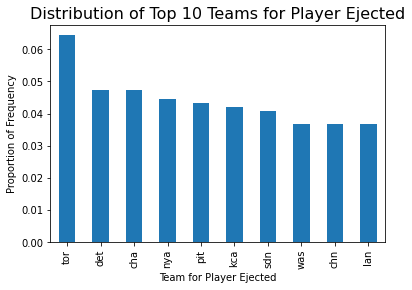

In [34]:
# Bar chart distribution of top 10 teams for player ejected
ejections_top10 = ejections_df['team'].value_counts(normalize=True)[:10].plot(kind='bar')
ejections_top10.set_title('Distribution of Top 10 Teams for Player Ejected', fontdict=font_dict)
ejections_top10.set_xlabel('Team for Player Ejected')
ejections_top10.set_ylabel('Proportion of Frequency')

In [35]:
# Creating dictionary for human-readable team names
teams_dict = {
    'tor' : 'Toronto Blue Jays',
    'det' : 'Detroit Tigers',
    'cha' : 'Chicago White Sox',
    'nya' : 'New York Yankees',
    'pit' : 'Pittsburgh Pirates',
    'kca' : 'Kansas City Royals',
    'sdn' : 'San Diego Padres',
    'lan' : 'Los Angeles Dodgers',
    'was' : 'Washington Nationals',
    'chn' : 'Chicago Cubs'
}

In [36]:
# Mapping teams
ejections_df['team'] = ejections_df['team'].replace(teams_dict)
ejections_df.head()

,ab_id,des,event_num,g_id,player_id,date,BS,CORRECT,team,is_home_team
0,2015003219,San Diego Padres center fielder Will Venable e...,732,201500044,461416,4/9/15,NaN,NaN,San Diego Padres,True
1,2015003219,San Diego Padres Manager Bud Black ejected by ...,734,201500044,111034,4/9/15,NaN,NaN,San Diego Padres,True
2,2015004134,Milwaukee Brewers second baseman Scooter Genne...,584,201500055,571697,4/10/15,Y,C,mil,True
3,2015006692,Cincinnati Reds Manager Bryan Price ejected by...,557,201500088,427406,4/12/15,NaN,NaN,cin,True
4,2015008446,Pittsburgh Pirates Manager Clint Hurdle ejecte...,402,201500111,116346,4/14/15,Y,I,Pittsburgh Pirates,True


Toronto Blue Jays       0.064389
Detroit Tigers          0.047306
Chicago White Sox       0.047306
New York Yankees        0.044678
Pittsburgh Pirates      0.043364
Kansas City Royals      0.042050
San Diego Padres        0.040736
Washington Nationals    0.036794
Chicago Cubs            0.036794
Los Angeles Dodgers     0.036794
Name: team, dtype: float64

Text(0, 0.5, 'Proportion of Frequency')

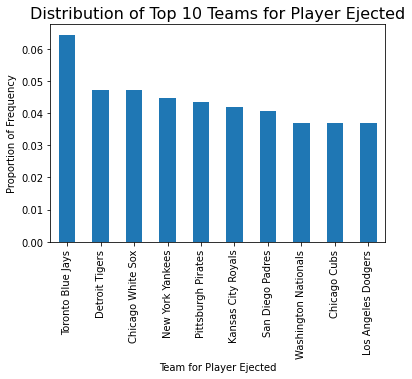

In [37]:
# Bar chart distribution of top 10 teams for player ejected with human-readable team names
display(ejections_df['team'].value_counts(normalize=True)[:10])
ejections_top10 = ejections_df['team'].value_counts(normalize=True)[:10].plot(kind='bar')
ejections_top10.set_title('Distribution of Top 10 Teams for Player Ejected', fontdict=font_dict)
ejections_top10.set_xlabel('Team for Player Ejected')
ejections_top10.set_ylabel('Proportion of Frequency')

From the above distribution, we see that the Toronto Blue Jays is the team with the highest proportion of players ejected from a game. Interestingly, the Toronto Blue Jays have a proportion of frequency value of over one percent greater than the second team, which is the Chicago White Sox. These two teams have the highest delta/difference in frequency values. As for the Chicago White Sox and the other eight teams in the top 10 teams, each of their respective proportion of frequency values is relatively similar. From the above distribution, we see that the distribution for these nine remaining teams relatively decreases by smaller amounts and eventually levels out.

In [49]:
# Loading in games data set
games_df = pd.read_csv('data/games.csv')
games_df.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [50]:
# Distributions of top 10 start times 
games_df['start_time'].value_counts(normalize=True)[:10]

7:10 PM    0.163511
7:11 PM    0.081395
7:08 PM    0.060198
7:07 PM    0.058860
1:10 PM    0.050731
1:11 PM    0.035810
7:09 PM    0.031900
7:15 PM    0.030562
7:06 PM    0.022844
6:40 PM    0.021815
Name: start_time, dtype: float64

In [51]:
# Determining if Start Time Affects a Player’s Skills
# Merging atbats and games data sets
atbats_and_games_df = pd.merge(atbats, games_df, on='g_id')
atbats_and_games_df.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,2015000001,572761,0,201500001,1,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,2015000002,518792,1,201500001,1,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
2,2015000003,407812,1,201500001,1,1,0,L,452657,R,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
3,2015000004,425509,0,201500001,1,2,0,L,452657,R,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
4,2015000005,571431,0,201500001,1,3,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0


In [52]:
# Group by event, whether the player is out (0) or the player gets on a base (1)
grouped_df = atbats_and_games_df.groupby('event')
grouped_df

In [53]:
# Get all events where the player is out
group0_df = grouped_df.get_group(0)
group0_df.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,2015000001,572761,0,201500001,1,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
3,2015000004,425509,0,201500001,1,2,0,L,452657,R,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
4,2015000005,571431,0,201500001,1,3,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
6,2015000007,624585,0,201500001,1,1,1,R,425794,R,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
7,2015000008,519203,0,201500001,1,2,1,R,425794,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0


In [54]:
# Proportions of the top 10 start times when the event type is an out
group0_df['start_time'].value_counts(normalize=True)[:10]

7:10 PM    0.163886
7:11 PM    0.081372
7:08 PM    0.060208
7:07 PM    0.058549
1:10 PM    0.050502
1:11 PM    0.035903
7:09 PM    0.032055
7:15 PM    0.030564
7:06 PM    0.022718
6:40 PM    0.021846
Name: start_time, dtype: float64

Text(0, 0.5, 'Proportion of Frequency')

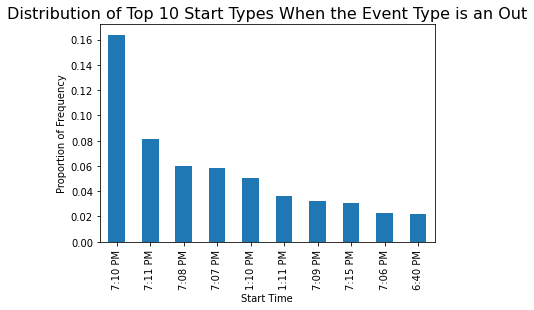

In [55]:
# Bar chart distribution of the top 10 start times when the event type is an out
group0 = group0_df['start_time'].value_counts(normalize=True)[:10].plot(kind='bar')
group0.set_title('Distribution of Top 10 Start Types When the Event Type is an Out', fontdict=font_dict)
group0.set_xlabel('Start Time')
group0.set_ylabel('Proportion of Frequency')

In [56]:
# Get all events where the player gets on a base
group1_df = grouped_df.get_group(1)
group1_df.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
1,2015000002,518792,1,201500001,1,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
2,2015000003,407812,1,201500001,1,1,0,L,452657,R,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
5,2015000006,451594,1,201500001,1,0,1,R,425794,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
10,2015000011,543939,1,201500001,2,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
11,2015000012,445055,1,201500001,2,1,0,L,452657,L,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0


In [57]:
# Proportions of the top 10 start times when the event type is getting on a base
group1_df['start_time'].value_counts(normalize=True)[:10]

7:10 PM    0.161929
7:11 PM    0.079034
7:08 PM    0.060908
7:07 PM    0.058719
1:10 PM    0.049339
1:11 PM    0.036228
7:09 PM    0.031915
7:15 PM    0.030107
6:40 PM    0.022840
7:06 PM    0.022578
Name: start_time, dtype: float64

Text(0, 0.5, 'Proportion of Frequency')

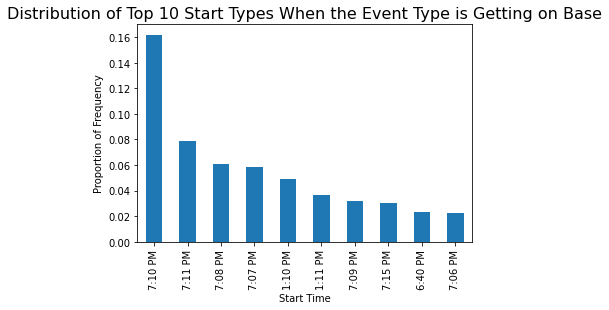

In [58]:
# Bar chart distribution of the top 10 start times when the event type is getting on a base
group1 = group1_df['start_time'].value_counts(normalize=True)[:10].plot(kind='bar')
group1.set_title('Distribution of Top 10 Start Types When the Event Type is Getting on Base', fontdict=font_dict)
group1.set_xlabel('Start Time')
group1.set_ylabel('Proportion of Frequency')

From the above distributions, we see that the start time has no effect on the resulting event, specifically whether the event results in the player getting out or on base. Comparing the distributions, we see that events resulting in an out occur marginally more often (16.38% for 7:10pm and 8.13% for 7:11pm) in games with the same start times, such as 7:10pm and 7:11pm, than events resulting in the player getting on a base (16.19% for 7:10pm and 7.90% for 7:11pm). 

In [59]:
# Data Cleaning

# Lets clean up the weather and wind columns into separate features
temperatures = atbats_and_games_df['weather'].str.split(' degrees,').apply(lambda x: int(x[0]))
conditions = atbats_and_games_df['weather'].str.split(' degrees,').apply(lambda x: x[1])
wind = atbats_and_games_df['wind'].str.split(' mph,').apply(lambda x: int(x[0]))
wind_directions = atbats_and_games_df['wind'].str.split('mph,').apply(lambda x: x[1].strip()).replace({'none': 'None'})

atbats_and_games_df = atbats_and_games_df.drop(['weather', 'wind'], axis=1)
atbats_and_games_df['temperature'] = temperatures
atbats_and_games_df['condition'] = conditions
atbats_and_games_df['wind_speed'] = wind
atbats_and_games_df['wind_direction'] = wind_directions

# For the purposes of batting, only the home plate umpire and first base umpire
# are important. Therefore, we will be dropping the 2B and 3B umpires.
atbats_and_games_df = atbats_and_games_df.drop(['umpire_2B', 'umpire_3B'], axis=1)

# Since we determines that start time does not affect players abilities,
# we will be dropping this column as well
atbats_and_games_df = atbats_and_games_df.drop('start_time', axis=1)

# Since we know that the home team always bats at the bottom of the inning,
# we can determine the team of the batter and their opponent. We can also
# update the names of the final_score columns and drop the 'top' column
atbats_and_games_df['team'] = (atbats_and_games_df
                               .apply(lambda x: x['home_team'] if x['top'] == False else x['away_team'], axis=1))
atbats_and_games_df['opponent'] = (atbats_and_games_df
                               .apply(lambda x: x['away_team'] if x['top'] == True else x['home_team'], axis=1))

atbats_and_games_df = atbats_and_games_df.rename(
    columns={'home_final_score': 'team_final_score', 'away_final_score': 'opp_final_score'})
atbats_and_games_df = atbats_and_games_df.drop(['home_team', 'away_team', 'top'], axis=1)

# Lets also break up the date column
atbats_and_games_df['year'] = atbats_and_games_df['date'].str.split('-').apply(lambda x: int(x[0]))
atbats_and_games_df['month'] = atbats_and_games_df['date'].str.split('-').apply(lambda x: int(x[1]))
atbats_and_games_df['day'] = atbats_and_games_df['date'].str.split('-').apply(lambda x: int(x[2]))
atbats_and_games_df = atbats_and_games_df.drop('date', axis=1)

# Lets do some more renaming to make the data set easier to read
atbats_and_games_df = atbats_and_games_df.rename(
    columns={'o': 'post_outs', 'p_score': 'opp_score', 
             'p_throws': 'pitcher_position', 'stand': 'batter_position',
             'elapsed_time': 'game_duration'})

# Finally, lets organize the columns
atbats_and_games_df = atbats_and_games_df[['ab_id', 'batter_id', 'batter_position', 
                                           'team', 'inning', 'post_outs', 'pitcher_id', 
                                           'pitcher_position', 'opponent', 'opp_score', 
                                           'g_id', 'attendance', 'year', 'month', 'day', 
                                           'game_duration', 'delay', 'temperature', 'condition', 
                                           'wind_speed', 'wind_direction', 'umpire_HP', 
                                           'umpire_1B', 'venue_name', 'team_final_score', 
                                           'opp_final_score', 'event']]

atbats_and_games_df.head()

,ab_id,batter_id,batter_position,team,inning,post_outs,pitcher_id,pitcher_position,opponent,opp_score,...,temperature,condition,wind_speed,wind_direction,umpire_HP,umpire_1B,venue_name,team_final_score,opp_final_score,event
0,2015000001,572761,L,sln,1,1,452657,L,sln,0,...,44,clear,7,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0
1,2015000002,518792,L,sln,1,1,452657,L,sln,0,...,44,clear,7,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,1
2,2015000003,407812,R,sln,1,1,452657,L,sln,0,...,44,clear,7,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,1
3,2015000004,425509,R,sln,1,2,452657,L,sln,0,...,44,clear,7,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0
4,2015000005,571431,L,sln,1,3,452657,L,sln,0,...,44,clear,7,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0


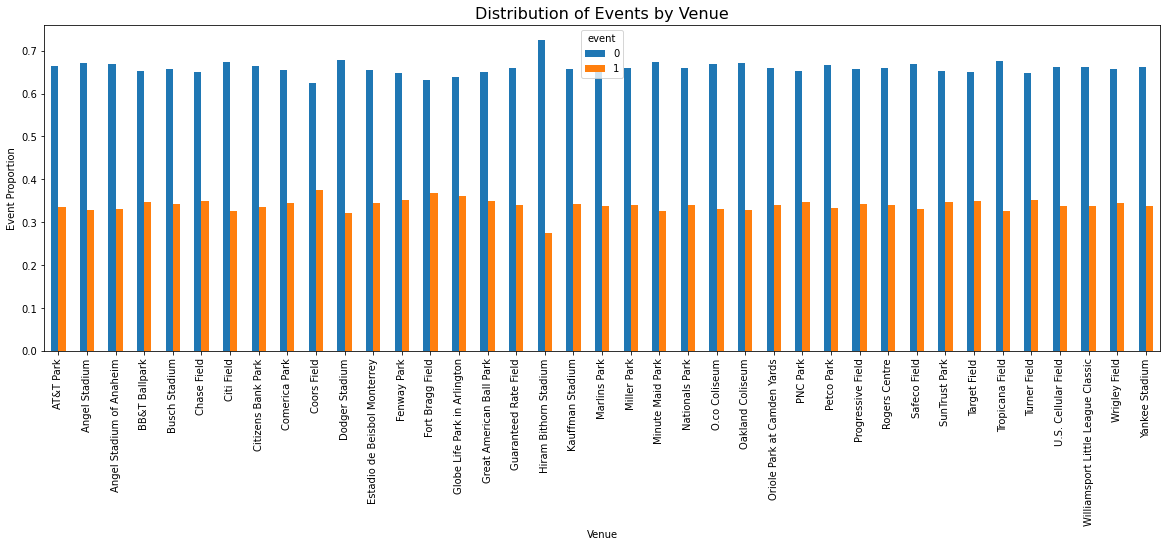

In [60]:
# Distribution of events by venue
venue_props = atbats_and_games_df.groupby('venue_name')['event'].value_counts(normalize=True)
venue_df = venue_props.to_frame().rename(columns={'event': 'event_prop'}).reset_index()
venue_viz = venue_df.pivot('venue_name', 'event', 'event_prop').plot(kind='bar', figsize=(20,6))

venue_viz.set_title('Distribution of Events by Venue', fontdict=font_dict)
venue_viz.set_xlabel('Venue')
venue_viz.set_ylabel('Event Proportion');

Clearly we can see here that different venues result in different proportions of events. This makes sense as some venues are actually more hit or 'home-run friendly' when compared to others.

In [61]:
# Distribution of events by weather conditions
atbats_and_games_df.groupby('condition')['event'].value_counts(normalize=True)

condition       event
 clear          0        0.659382
                1        0.340618
 cloudy         0        0.659075
                1        0.340925
 dome           0        0.675039
                1        0.324961
 drizzle        0        0.644856
                1        0.355144
 overcast       0        0.659438
                1        0.340562
 partly cloudy  0        0.656924
                1        0.343076
 rain           0        0.645503
                1        0.354497
 roof closed    0        0.662540
                1        0.337460
 snow           0        0.650000
                1        0.350000
 sunny          0        0.660031
                1        0.339969
Name: event, dtype: float64

Interestingly, negative events happen most when the stadium is closed (dome or roof closed). Positive events happen most when there is rain or drizzle.

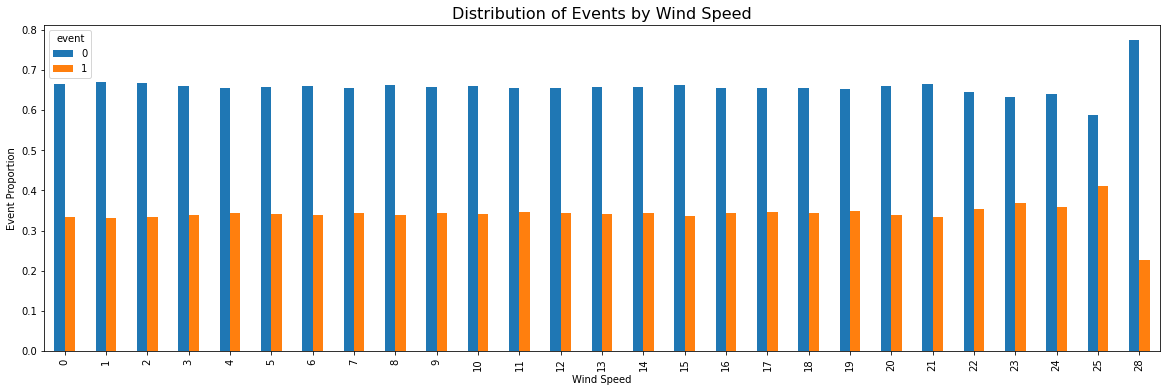

In [62]:
# Distribution of events by wind speed
winds = atbats_and_games_df.groupby('wind_speed')['event'].value_counts(normalize=True)
wind_df = winds.to_frame().rename(columns={'event': 'event_prop'}).reset_index().sort_values('wind_speed')
wind_viz = wind_df.pivot('wind_speed', 'event', 'event_prop').plot(kind='bar', figsize=(20,6))

wind_viz.set_title('Distribution of Events by Wind Speed', fontdict=font_dict)
wind_viz.set_xlabel('Wind Speed')
wind_viz.set_ylabel('Event Proportion');

In [63]:
# Distribution of events by wind direction
atbats_and_games_df.groupby('wind_direction')['event'].value_counts(normalize=True)

wind_direction  event
Calm            0        0.667158
                1        0.332842
In from CF      0        0.654896
                1        0.345104
In from LF      0        0.654836
                1        0.345164
In from RF      0        0.654304
                1        0.345696
L to R          0        0.658908
                1        0.341092
None            0        0.665264
                1        0.334736
Out to CF       0        0.659809
                1        0.340191
Out to LF       0        0.658850
                1        0.341150
Out to RF       0        0.664897
                1        0.335103
R to L          0        0.654018
                1        0.345982
Varies          0        0.661845
                1        0.338155
Name: event, dtype: float64

In [64]:
# Distribution of events by month
atbats_and_games_df.groupby('month')['event'].value_counts(normalize=True)

month  event
3      0        0.668096
       1        0.331904
4      0        0.661217
       1        0.338783
5      0        0.660958
       1        0.339042
6      0        0.658571
       1        0.341429
7      0        0.658471
       1        0.341529
8      0        0.658010
       1        0.341990
9      0        0.657797
       1        0.342203
10     0        0.673035
       1        0.326965
Name: event, dtype: float64

In [65]:
durations = atbats_and_games_df.groupby('game_duration')['event'].value_counts(normalize=True)
durations_df = durations.to_frame().rename(columns={'event': 'event_prop'}).reset_index()
durations = durations_df.pivot('game_duration', 'event', 'event_prop').reset_index()
durations.head()

event,game_duration,0,1
0,75,0.692308,0.307692
1,100,0.666667,0.333333
2,101,0.577778,0.422222
3,104,0.648148,0.351852
4,107,0.653846,0.346154


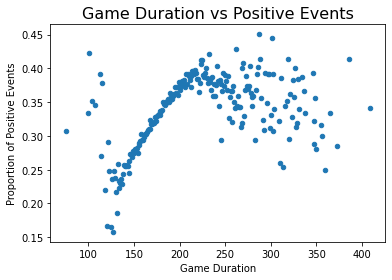

In [66]:
durations = atbats_and_games_df.groupby('game_duration')['event'].value_counts(normalize=True)
durations_df = durations.to_frame().rename(columns={'event': 'event_prop'}).reset_index()
durations = durations_df.pivot('game_duration', 'event', 'event_prop')
durations_viz = durations[1].reset_index().plot(kind='scatter', x='game_duration', y=1)

durations_viz.set_title('Game Duration vs Positive Events', fontdict=font_dict)
durations_viz.set_xlabel('Game Duration')
durations_viz.set_ylabel('Proportion of Positive Events');

The above plot is actually very interesting. We can see that for games lasting between ~125 and ~200 minutes, the longer games have higher proportions of positive events. However, once it goes past this ~200 minute mark (possibly overtime), there is a lot more variation although it can be argued that it has a downward trend.

# Adding Features
Goal: Predict wheter the batter has a "positive at bat"

In [67]:
# Event Mapping: We can define a positive at-bat as an event in which the batter either progresses to a base, 
# scores a home run, or gets out but allows a teammate to progress (sacrifice). 
# A negative at-bat is an event in which no progress is made.

In [69]:
# the pitches data contains details of the trajectory of the pitch
pitches = atbats = pd.read_csv('data/pitches.csv')
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [70]:
# some of the columns do not have descriptions on Kaggle so we are not sure what they represent
keep = ['ab_id', 'px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 
        'spin_dir', 'code', 'type', 'pitch_type', 'event_num', 'b_score', 
        'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b']
pitches_df =  pitches[keep]

In [71]:
# # combine with at_bat_games and add the outcome of the pitch
pitches_df = pd.merge(pitches_df, atbats_and_games_df[['ab_id', 'batter_id', 'event']], on='ab_id', how='outer')
pitches_df.head()

,ab_id,px,pz,start_speed,end_speed,spin_rate,spin_dir,code,type,pitch_type,...,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,event
0,2.015000e+09,0.416,2.963,92.9,84.1,2305.052,159.235,C,S,FF,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,572761,0
1,2.015000e+09,-0.191,2.347,92.8,84.1,2689.935,151.402,S,S,FF,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,572761,0
2,2.015000e+09,-0.518,3.284,94.1,85.2,2647.972,145.125,F,S,FF,...,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,572761,0
3,2.015000e+09,-0.641,1.221,91.0,84.0,1289.590,169.751,B,B,FF,...,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,572761,0
4,2.015000e+09,-1.821,2.083,75.4,69.6,1374.569,280.671,B,B,CU,...,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,572761,0


In [76]:
atbats_raw = pd.read_csv('data/atbats.csv')
atbats_raw = atbats_raw.rename(columns={'event':'event type'})
atbats_raw['event type'].value_counts()['Strikeout']
# need original data before mapping to find ratio of strikeouts

157128

In [77]:
# add on base average, strike out percentage
on_base_avg = pitches_df.groupby('batter_id').aggregate({'event': np.average})
strikeouts = atbats_raw.groupby('batter_id')['event type'].value_counts().loc[:, 'Strikeout']
strikeouts = strikeouts.rename(index='strikes')
total_bats = atbats_raw.groupby('batter_id')['event type'].aggregate('count')
total_bats = total_bats.rename(index='total')
strikeout_percentage = pd.DataFrame([strikeouts, total_bats]).T
strikeout_percentage['%'] = strikeout_percentage['strikes'] / strikeout_percentage['total']
strikeout_percentage = strikeout_percentage['%']
print(on_base_avg.head())
print('\n')
print(strikeout_percentage.head())

              event
batter_id          
112526     0.128773
115629     0.000000
116338     0.332056
120074     0.419003
121347     0.358982


batter_id
112526    0.503268
115629    1.000000
116338    0.184534
120074    0.143548
121347    0.244804
Name: %, dtype: float64


In [78]:
# combine into df
pitches_agg = on_base_avg.join(pd.DataFrame(strikeout_percentage))
pitches_agg.head()

,event,%
batter_id,,
112526,0.128773,0.503268
115629,0.000000,1.000000
116338,0.332056,0.184534
120074,0.419003,0.143548
121347,0.358982,0.244804


In [79]:
# the strikeout_percentages that are high are from batters with low total at bats, may want to disreguard for actual model
# or set some kind of threshold

In [80]:
# Add defensive index: Defensive Efficiency Ratio (DER)
#  Naturally, a batter who meets an opponent team with a good defensive ability will have a hard time getting on base.
# 1 - (hits - home runs) / (plate appearences - bases on walks - strikeouts - hits by pitches - home runs)
# computes the rate in which a batter gets on base

In [81]:
total_bats = atbats_raw.groupby('batter_id')['event type'].value_counts()

In [82]:
hits_ = ['Single', 'Double', 'Home Run', 'Sac Fly', 'Sac Bunt']
home_runs_ = ['Home Run']
walks_ = ['Walk']
hits_by_pitch_ = ['Hit By Pitch']

In [83]:
hits = pd.DataFrame(atbats_raw.groupby('batter_id')['event type'].value_counts()
                    .loc[:, hits_].sum(level=0)).reset_index().rename(columns={'event type':'hits'})
home_runs = pd.DataFrame(atbats_raw.groupby('batter_id')['event type'].value_counts()
                         .loc[:, home_runs_].sum(level=0)).reset_index().rename(columns={'event type':'home_runs'})
walks = pd.DataFrame(atbats_raw.groupby('batter_id')['event type'].value_counts()
                     .loc[:, walks_].sum(level=0)).reset_index().rename(columns={'event type':'walks'})
hits_by_pitch = pd.DataFrame(atbats_raw.groupby('batter_id')['event type'].value_counts()
                             .loc[:, hits_by_pitch_].sum(level=0)).reset_index().rename(columns={'event type':'hits_by_pitch'})
plate_appear = pd.DataFrame(atbats_raw['batter_id'].value_counts()).reset_index().rename(columns={'batter_id': 'plate_appear', 'index':'batter_id'})

In [84]:
data_frames = [plate_appear, hits, home_runs, walks, hits_by_pitch]
DER = hits.merge(home_runs).merge(walks).merge(hits_by_pitch).merge(plate_appear)
DER.head()

,batter_id,hits,home_runs,walks,hits_by_pitch,plate_appear
0,112526,23,1,1,1,153
1,116338,130,22,34,6,569
2,120074,328,75,126,2,1240
3,121347,184,42,93,7,866
4,133380,121,17,28,5,517


In [85]:
# 1 - (hits - home runs) / (plate appearances - bases on walks - strikeouts - hits by pitches - home runs)
def DER_transform(row, strikeouts_ser=strikeouts):
    SO = strikeouts_ser.loc[row.batter_id]
    der = (row.hits - row.home_runs) / (row.plate_appear - row.hits_by_pitch - SO - row.hits_by_pitch - row.home_runs)
    return 1 - der

In [86]:
#DER_df = DER.set_index('batter_id')
DER_df = DER.apply(lambda x: DER_transform(x), axis=1)
DER_df = pd.DataFrame(DER_df).set_index(DER['batter_id']).rename(columns={0:'DER'})
DER_df.head()

,DER
batter_id,
112526,0.698630
116338,0.748837
120074,0.742625
121347,0.762542
133380,0.753555


In [87]:
# combine with pitches_agg
pitches_der_df = DER_df.join(pitches_agg)
pitches_der_df.head()

,DER,event,%
batter_id,,,
112526,0.698630,0.128773,0.503268
116338,0.748837,0.332056,0.184534
120074,0.742625,0.419003,0.143548
121347,0.762542,0.358982,0.244804
133380,0.753555,0.318457,0.131528


In [88]:
atbats_games_pitches = pd.merge(atbats_and_games_df, pitches_der_df, on='batter_id')
atbats_games_pitches.columns

Index(['ab_id', 'batter_id', 'batter_position', 'team', 'inning', 'post_outs',
       'pitcher_id', 'pitcher_position', 'opponent', 'opp_score', 'g_id',
       'attendance', 'year', 'month', 'day', 'game_duration', 'delay',
       'temperature', 'condition', 'wind_speed', 'wind_direction', 'umpire_HP',
       'umpire_1B', 'venue_name', 'team_final_score', 'opp_final_score',
       'event_x', 'DER', 'event_y', '%'],
      dtype='object')

In [89]:
atbats_games_pitches = atbats_games_pitches.rename(columns={'event_x': 'event', 'event_y': 'avg_event', '%': 'strikeout_%'})
atbats_games_pitches.head()

,ab_id,batter_id,batter_position,team,inning,post_outs,pitcher_id,pitcher_position,opponent,opp_score,...,wind_direction,umpire_HP,umpire_1B,venue_name,team_final_score,opp_final_score,event,DER,avg_event,strikeout_%
0,2015000001,572761,L,sln,1,1,452657,L,sln,0,...,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0,0.75341,0.399246,0.213496
1,2015000014,572761,L,sln,2,2,452657,L,sln,0,...,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,1,0.75341,0.399246,0.213496
2,2015000035,572761,L,sln,5,0,452657,L,sln,0,...,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,1,0.75341,0.399246,0.213496
3,2015000048,572761,L,sln,6,3,435400,R,sln,0,...,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0,0.75341,0.399246,0.213496
4,2015000069,572761,L,sln,9,1,444468,R,sln,0,...,In from CF,Mike Winters,Mark Wegner,Wrigley Field,0,3,0,0.75341,0.399246,0.213496


In [90]:
# This was already run and uploaded to the drive so we don't need
# to run all the above code anymore
#atbats_games_pitches.to_csv('final_bats.csv', index=False)

## Building our model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [92]:
atbats_games_pitches = pd.read_csv('data/final_bats.csv')

# First, let's begin by building a training, test, and validation set
# We will assign 60% to our training, 20% to test, and 20% to validation set
X = atbats_games_pitches.drop(['event', 'ab_id', 'umpire_1B','delay'], axis=1)
y = atbats_games_pitches['event']

# Included a specific random state to work with consistent splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=42)

In [93]:
# We have a lot of categorical features so we will need to one-hot encode them
cat = ['batter_id', 'batter_position', 'team', 'inning', 'pitcher_id',
       'pitcher_position', 'year', 'month', 'day', 'condition', 
       'wind_direction', 'venue_name', 'umpire_HP', 'g_id', 'opponent']

In [94]:
# Lets build a quick logistic regression pipeline
ct = ColumnTransformer(transformers=[
        ('one-hot', OneHotEncoder(handle_unknown ='ignore'), cat)
    ], remainder='passthrough')

# The regressor was mainly predicting negative events, so we will be
# balancing it
bat_clf = Pipeline([('ct', ct),
                    ('lr', LogisticRegression(C=.0001))])
                     #('lr', LogisticRegression(C=1000, class_weight='balanced'))])

bat_clf.fit(X_train, y_train)

# Training accuracy
preds = bat_clf.predict(X_train)
np.mean(preds == y_train)

c:\users\12097\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7331232460892163

In [95]:
# Validation accuracy
# Max of 75.8% when not including umpire_1B, month, but only 13% predictions of 1
# Max of 75.4% when not including umpire_1B but 20% predictions of 1
# Max of 75.6% when not including umpire_1B, delay but 20% predictions of 1
# Max of 76.2% when not including umpire_1B, delay, strikeout_% but 15% predictions of 1
preds_valid = bat_clf.predict(X_val)
np.mean(preds_valid == y_val)

0.7320404794996526

In [96]:
preds_valid.mean()

0.22892778549918924

In [97]:
y_val.mean()

0.3446693305536252

In [98]:
f1_score(y_val, preds_valid)

0.5328436754628402

In [99]:
precision_score(y_val, preds_valid)

0.6675415019762846

In [100]:
recall_score(y_val, preds_valid)

0.4433779980677952

In [101]:
# Test accuracy
# Max of 75.5% when not including umpire_1B but 20% predictions of 1 (better overall)
# Max of 75.8% when not including umpire_1B, delay but 20% predictions of 1 (better overall)
# Max of 76.3% when not including umpire_1B, delay, strikeout_% but 15% predictions of 1
preds_test = bat_clf.predict(X_test)
np.mean(preds_test == y_test)

0.733278318276581

In [102]:
preds_test.mean()

0.22798673847579337

In [103]:
y_test.mean()

0.34490821172110264

In [104]:
f1_score(y_test, preds_test)

0.5344317808496122

In [105]:
precision_score(y_test, preds_test)

0.6714716621685982

In [106]:
recall_score(y_test, preds_test)

0.443847461540076

In [107]:
# How would our trivial classifier perform?
trivial_pred = [0] * len(y_test)

In [108]:
np.mean(trivial_pred == y_test)

0.6550917882788974

In [109]:
f1_score(y_test, trivial_pred)

0.0

In [110]:
precision_score(y_test, trivial_pred)

c:\users\12097\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [111]:
recall_score(y_test, trivial_pred)

0.0

In [112]:
# Now, let's try using LinearSVC to see how its performance 
# compares to that of LogisticRegression
from sklearn.svm import LinearSVC

In [113]:
ct = ColumnTransformer(transformers=[
        ('one-hot', OneHotEncoder(handle_unknown ='ignore'), cat)
    ], remainder='passthrough')
# The regressor was mainly predicting negative events, so we will be
# balancing it
bat_clf2 = Pipeline([('ct', ct),
                     ('svc', LinearSVC())])

bat_clf2.fit(X_train, y_train)

# Training accuracy
preds2 = bat_clf2.predict(X_train)
np.mean(preds2 == y_train)

c:\users\12097\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7388322784733767

In [114]:
# Validation accuracy
preds_valid2 = bat_clf2.predict(X_val)
np.mean(preds_valid2 == y_val)

0.7399525133194348

In [115]:
np.mean(preds_valid2)

0.11518415566365532

In [116]:
np.mean( y_val)

0.3446693305536252

In [117]:
# Test accuracy
preds_test2 = bat_clf2.predict(X_test)
np.mean(preds_test2 == y_test)

0.7390693768820941

In [118]:
f1_score(y_test, preds_test2)

0.4328823159219635

In [119]:
precision_score(y_test, preds_test2)

0.8645132910199208

In [120]:
recall_score(y_test, preds_test2)

0.2887275169475518

In [121]:
# Now, let's try using a RandomForestClassifier to get feature importances
from sklearn.ensemble import RandomForestClassifier

In [122]:
# The regressor was mainly predicting negative events, so we will be
# balancing it
bat_clf3 = Pipeline([('ct', ct),
                     ('rf', RandomForestClassifier(max_features=28))])

bat_clf3.fit(X_train, y_train)

# Training accuracy
preds3 = bat_clf3.predict(X_train)
np.mean(preds3 == y_train)

1.0

In [123]:
# Validation accuracy
preds_valid3 = bat_clf3.predict(X_val)
np.mean(preds_valid3 == y_val)

0.7305565207319898

In [124]:
# Test accuracy
preds_test3 = bat_clf3.predict(X_test)
np.mean(preds_test3 == y_test)

0.7293114431318045

In [125]:
bat_clf3.steps[1][1].feature_importances_

array([2.66046244e-05, 1.04029123e-04, 1.76749199e-04, ...,
       3.78922198e-02, 3.86644774e-02, 3.79121965e-02])

In [127]:
len(bat_clf3.steps[1][1].feature_importances_)

12031

In [128]:
display(len(X_train.columns))
X_train.head()

26

,batter_id,batter_position,team,inning,post_outs,pitcher_id,pitcher_position,opponent,opp_score,g_id,...,condition,wind_speed,wind_direction,umpire_HP,venue_name,team_final_score,opp_final_score,DER,av_event,strikeout_%
278372,435622,R,col,7,1,543557,L,col,12,201800270,...,cloudy,5,Out to CF,Vic Carapazza,Coors Field,5,16,0.706928,0.331326,0.249352
228210,467827,L,col,6,1,596295,L,col,2,201801615,...,clear,5,In from RF,Nic Lentz,Busch Stadium,6,3,0.682313,0.326897,0.165581
15642,516770,R,nya,4,1,573186,R,nya,0,201702415,...,partly cloudy,8,L to R,Todd Tichenor,Yankee Stadium,2,1,0.693798,0.340072,0.182879
686829,641583,L,oak,1,1,605242,R,oak,0,201801204,...,partly cloudy,6,In from LF,Ryan Additon,Comerica Park,2,4,0.750000,0.264052,0.231527
474992,461865,L,det,4,2,573186,R,det,0,201702104,...,clear,11,In from CF,Alfonso Marquez,Rogers Centre,4,5,0.709924,0.310750,0.217540


In [129]:
bat_clf3.steps[1][1]

RandomForestClassifier(max_features=28)

In [130]:
bat_clf3.steps[1][1].n_features_

12031